In [1]:
! pip install pandas numpy scikit-learn matplotlib 


[notice] A new release of pip available: 22.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# importing necessary libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.compose import ColumnTransformer

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import PassiveAggressiveClassifier

from sklearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt

import pickle

In [3]:
# importing dataset- true for true news and fake for fake news
true_df = pd.read_csv("model code/True.csv")

fake_df = pd.read_csv("model code/Fake.csv")

In [4]:
# assigning labels indicating the true and false news
true_df['label'] = 1
fake_df['label'] = 0

In [5]:
# shaoe of both dataset
print(true_df.shape)
print(fake_df.shape)

(21417, 5)
(23481, 5)


In [6]:
true_df.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [7]:
fake_df.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [8]:
# merging both dataset into one dataset
df = pd.concat([true_df, fake_df], axis=0)

In [9]:
df.sample(5)

,title,text,subject,date,label
1255,Trump says he can end Iran deal if no action t...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"October 13, 2017",1
6307,Paul Ryan ADMITS He Wants People To Work More...,Knowing that hardworking Americans need to be ...,News,"May 18, 2016",0
17697,China's richest man built fortune even as debt...,HONG KONG (Reuters) - Named the richest man in...,worldnews,"October 12, 2017",1
13637,U.S. requests U.N. Security Council meet on No...,UNITED NATIONS (Reuters) - The United States a...,worldnews,"November 28, 2017",1
7041,Hillary Responds To Bernie Calling Her Unqual...,It seems there s a bit of infighting happening...,News,"April 7, 2016",0


In [10]:
# checking the null values
df.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [11]:
# checking the duplicated sum
df.duplicated().sum()

np.int64(209)

In [12]:
# droping duplicates
df.drop_duplicates(inplace=True)

In [13]:
# again droping the dataset if any of the duplicates again exists
df.drop_duplicates(inplace=True)

In [14]:
# droping all other columns except text or content column
df.drop(columns=['date'], inplace=True)
df.drop(columns=['title'], inplace=True)
df.drop(columns=['subject'], inplace=True)

In [15]:
df.sample(2)

,text,label
4922,Cher is a legend among pop singers. She is als...,0
11901,Wouldn t you know that the CIA director had wo...,0


In [16]:
# assigning the variables for train test split
X = df['text']
y = df['label']

In [17]:
# spliting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# creating column transformer which encode the text columns
preprocessing = ColumnTransformer(
    transformers=[
        ('text_encoder', TfidfVectorizer(stop_words='english', max_df=0.7, max_features=5000), 'text'),
    ],
    remainder='drop'
)

In [19]:
df.head(1)

,text,label
0,WASHINGTON (Reuters) - The head of a conservat...,1


In [20]:
X_train

7041     NEW YORK (Reuters) - The Obama administration ...
5254     WASHINGTON (Reuters) - Billionaire investor Wi...
18761    What a shocker! A CNN panel rips on Tom Perez ...
3064     If you had any doubt left about whether FBI Di...
20909    Here is a screen shot of the Facebook post by ...
                               ...                        
6302     BERLIN (Reuters) - German Finance Minister Wol...
11347    PUERTO ORDAZ, Venezuela (Reuters) - Venezuelan...
16950     The U.S. is the great enemy of mankind!  rave...
862      NEW YORK (Reuters) - U.S. money managers with ...
15975    SYDNEY (Reuters) - Hundreds of asylum seekers ...
Name: text, Length: 35751, dtype: object

In [21]:
# creating pipeline which encode the text content and train the model
pipe1 = Pipeline(
    steps=[
        ('preprocessing', preprocessing),
        ('train', PassiveAggressiveClassifier())
    ]
)

In [22]:
# fitting X_train into pipeline
pipe1.fit(X_train.to_frame(), y_train) 

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('text_encoder',
                                                  TfidfVectorizer(max_df=0.7,
                                                                  max_features=5000,
                                                                  stop_words='english'),
                                                  'text')])),
                ('train', PassiveAggressiveClassifier())])

In [23]:
# predicting the values
y_pred = pipe1.predict(X_test.to_frame())

In [24]:
y_pred

array([1, 0, 0, ..., 1, 0, 0])

In [25]:
# finding the accuracy of the model
accuracy_score(y_pred, y_test)

0.9931752069814276

In [26]:
# creating confusion matrix for better understanding
confusion_matrix(y_pred, y_test)

array([[4622,   35],
       [  26, 4255]])

In [27]:
# exporting model in pickle
pickle.dump(pipe1, open('model code/model.pkl', 'wb'))

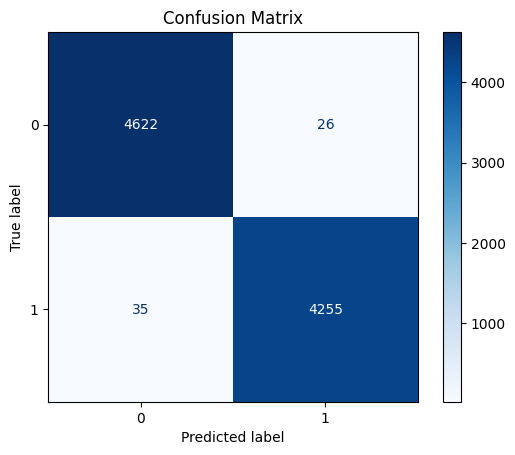

In [28]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipe1.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [29]:
# calling the model to check it
model = pickle.load(open('model code/model.pkl', 'rb'))

In [30]:
# sample text to check the model is working or not
input_data = pd.DataFrame({
    'text': ["WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a â€œfiscal conservativeâ€ on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBSâ€™ â€œFace the Nation,â€ drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-defense â€œdiscretionaryâ€ spending on programs that support education, scientific research, infrastructure, public health and environmental protection. â€œThe (Trump) administration has already been willing to say: â€˜Weâ€™re going to increase non-defense discretionary spending ... by about 7 percent,â€™â€ Meadows, chairman of the small but influential House Freedom Caucus, said on the program. â€œNow, Democrats are saying thatâ€™s not enough, we need to give the government a pay raise of 10 to 11 percent. For a fiscal conservative, I donâ€™t see where the rationale is. ... Eventually you run out of other peopleâ€™s money,â€ he said. Meadows was among Republicans who voted in late December for their partyâ€™s debt-financed tax overhaul, which is expected to balloon the federal budget deficit and add about $1.5 trillion over 10 years to the $20 trillion national debt. â€œItâ€™s interesting to hear Mark talk about fiscal responsibility,â€ Democratic U.S. Representative Joseph Crowley said on CBS. Crowley said the Republican tax bill would require the  United States to borrow $1.5 trillion, to be paid off by future generations, to finance tax cuts for corporations and the rich. â€œThis is one of the least ... fiscally responsible bills weâ€™ve ever seen passed in the history of the House of Representatives. I think weâ€™re going to be paying for this for many, many years to come,â€ Crowley said. Republicans insist the tax package, the biggest U.S. tax overhaul in more than 30 years,  will boost the economy and job growth. House Speaker Paul Ryan, who also supported the tax bill, recently went further than Meadows, making clear in a radio interview that welfare or â€œentitlement reform,â€ as the party often calls it, would be a top Republican priority in 2018. In Republican parlance, â€œentitlementâ€ programs mean food stamps, housing assistance, Medicare and Medicaid health insurance for the elderly, poor and disabled, as well as other programs created by Washington to assist the needy. Democrats seized on Ryanâ€™s early December remarks, saying they showed Republicans would try to pay for their tax overhaul by seeking spending cuts for social programs. But the goals of House Republicans may have to take a back seat to the Senate, where the votes of some Democrats will be needed to approve a budget and prevent a government shutdown. Democrats will use their leverage in the Senate, which Republicans narrowly control, to defend both discretionary non-defense programs and social spending, while tackling the issue of the â€œDreamers,â€ people brought illegally to the country as children. Trump in September put a March 2018 expiration date on the Deferred Action for Childhood Arrivals, or DACA, program, which protects the young immigrants from deportation and provides them with work permits. The president has said in recent Twitter messages he wants funding for his proposed Mexican border wall and other immigration law changes in exchange for agreeing to help the Dreamers. Representative Debbie Dingell told CBS she did not favor linking that issue to other policy objectives, such as wall funding. â€œWe need to do DACA clean,â€ she said.  On Wednesday, Trump aides will meet with congressional leaders to discuss those issues. That will be followed by a weekend of strategy sessions for Trump and Republican leaders on Jan. 6 and 7, the White House said. Trump was also scheduled to meet on Sunday with Florida Republican Governor Rick Scott, who wants more emergency aid. The House has passed an $81 billion aid package after hurricanes in Florida, Texas and Puerto Rico, and wildfires in California. The package far exceeded the $44 billion requested by the Trump administration. The Senate has not yet voted on the aid. "]
})

In [31]:
# predicting via imported model
model.predict(input_data)

array([1])